## I decided to treat this as a classification problem by creating a new binary  variable affair (did the woman have at least one affair?) and trying to  predict the classification for each woman. 

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score,precision_score,recall_score,precision_recall_curve,f1_score,roc_auc_score,roc_curve
from patsy import dmatrices,dmatrix

In [2]:
dta = sm.datasets.fair.load_pandas().data

In [3]:
dta['affair'] = (dta.affairs > 0).astype(int)

In [4]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [5]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ +C(occupation) + C(occupation_husb)', dta, return_type="dataframe")

In [6]:
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [7]:
y = np.ravel(y)

In [8]:
X = np.array(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=34)

In [10]:
lr = LogisticRegression()

In [11]:
lr.fit(X_train, y_train)

LogisticRegression()

Cross Validation Score
[0.70722135 0.72270228 0.71956009 0.72034564 0.75098193]
Avg:  0.7241622590180552
Accuracy Score:  0.7241595978636507
Precision:  0.6287944492627927
Recall:  0.35314174378957625
F1 Score:  0.4566978193146417
ROC AUC Score:  0.6293655188287113


Text(0.5, 1.0, 'Precision Recall Curve')

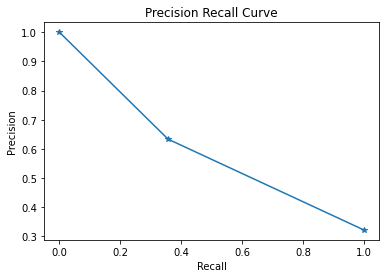

In [13]:
print("=================================")
print("Cross Validation Score")
print(cross_val_score(lr, X, y, cv=5))
print("Avg: ", np.average(cross_val_score(lr, X, y, cv=5)))
print("=================================")

print("Accuracy Score: ", accuracy_score(y, cross_val_predict(lr, X, y, cv=5)))

print("Precision: ", precision_score(y, cross_val_predict(lr, X, y, cv=5)))
print("Recall: ", recall_score(y, cross_val_predict(lr, X, y, cv=5)))

precision, recall, thresholds = precision_recall_curve(y, lr.predict(X))

print("F1 Score: ", f1_score(y, lr.predict(X)))
print("ROC AUC Score: ", roc_auc_score(y, lr.predict(X)))

plt.plot(recall, precision, marker="*")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve")